# Assignment 1

__*m12001643 Ilyes Justin <br>
m11804717 Seidl Stefan <br>
m Wagemaier Daniel*__ <br>

## 1) Import Librarys, data and create test and training sets

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
import sklearn.model_selection as skms
from sklearn import tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [10, 5] #change inline figure size [width, higth]

df = pd.read_csv("alldigits.csv")
data = df.to_numpy()

X = data[:, :-1]
y = data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


## 2) Plotting the Images

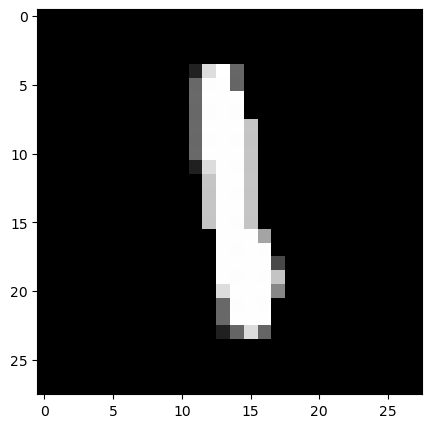

In [2]:
pictures = []
for row in data:
    single_picture_matrix = []
    for i in range(28):
        innerList = []
        for j in range(28):
            innerList.append(int(row[j * 28 + i]))
        single_picture_matrix.append(innerList)
    pictures.append(single_picture_matrix)


n = 200    
plt.imshow(pictures[n], cmap='Greys_r', vmin=0, vmax=255)
plt.show() 

# 3) Analyse the Data

Points in Trainset: 3000
Points in Testset: 3000
Test/Train Ratio: 1.0


Text(0.5, 0, 'Numbers')

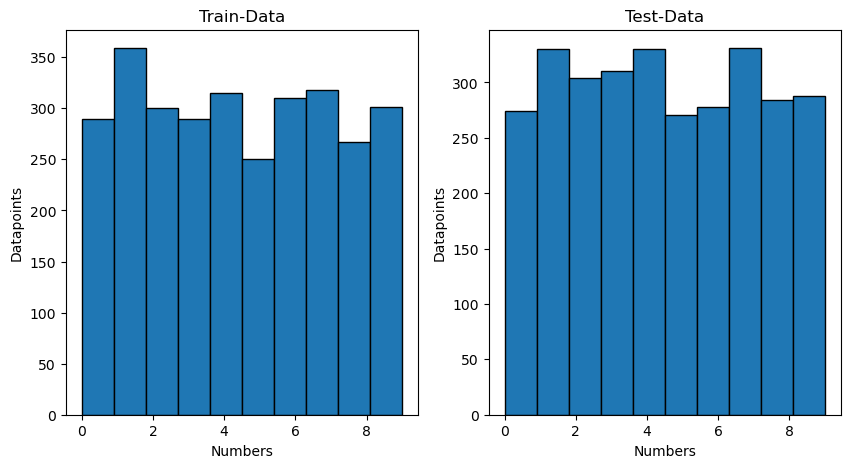

In [3]:
print("Points in Trainset: " + str(len(y_train)))
print("Points in Testset: " + str(len(y_test)))
print("Test/Train Ratio: " + str(len(y_test)/len(y_train)))

plt.figure(1)
plt.align = "mid"
plt.subplot(121)
plt.hist(y_train,10,edgecolor="black")
plt.title("Train-Data")
plt.xlabel("Numbers")
plt.ylabel("Datapoints")
plt.subplot(122)
plt.hist(y_test,10,edgecolor="black")
plt.title("Test-Data")
plt.ylabel("Datapoints")
plt.xlabel("Numbers")



# 4) Decision Tree

In [4]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
train_r = clf.score(X_train, y_train)

In [5]:
print(
    f"Classification report of Decision Tree:\n"
    f"{classification_report(y_test, predicted)}\n"
    f"Training R-squared: {train_r}\n"
)

Classification report of Decision Tree:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       274
           1       0.82      0.88      0.85       330
           2       0.73      0.70      0.71       304
           3       0.67      0.65      0.66       310
           4       0.74      0.75      0.75       330
           5       0.71      0.64      0.67       271
           6       0.73      0.76      0.75       278
           7       0.78      0.76      0.77       331
           8       0.65      0.60      0.62       284
           9       0.65      0.72      0.68       288

    accuracy                           0.73      3000
   macro avg       0.73      0.73      0.73      3000
weighted avg       0.73      0.73      0.73      3000

Training R-squared: 1.0



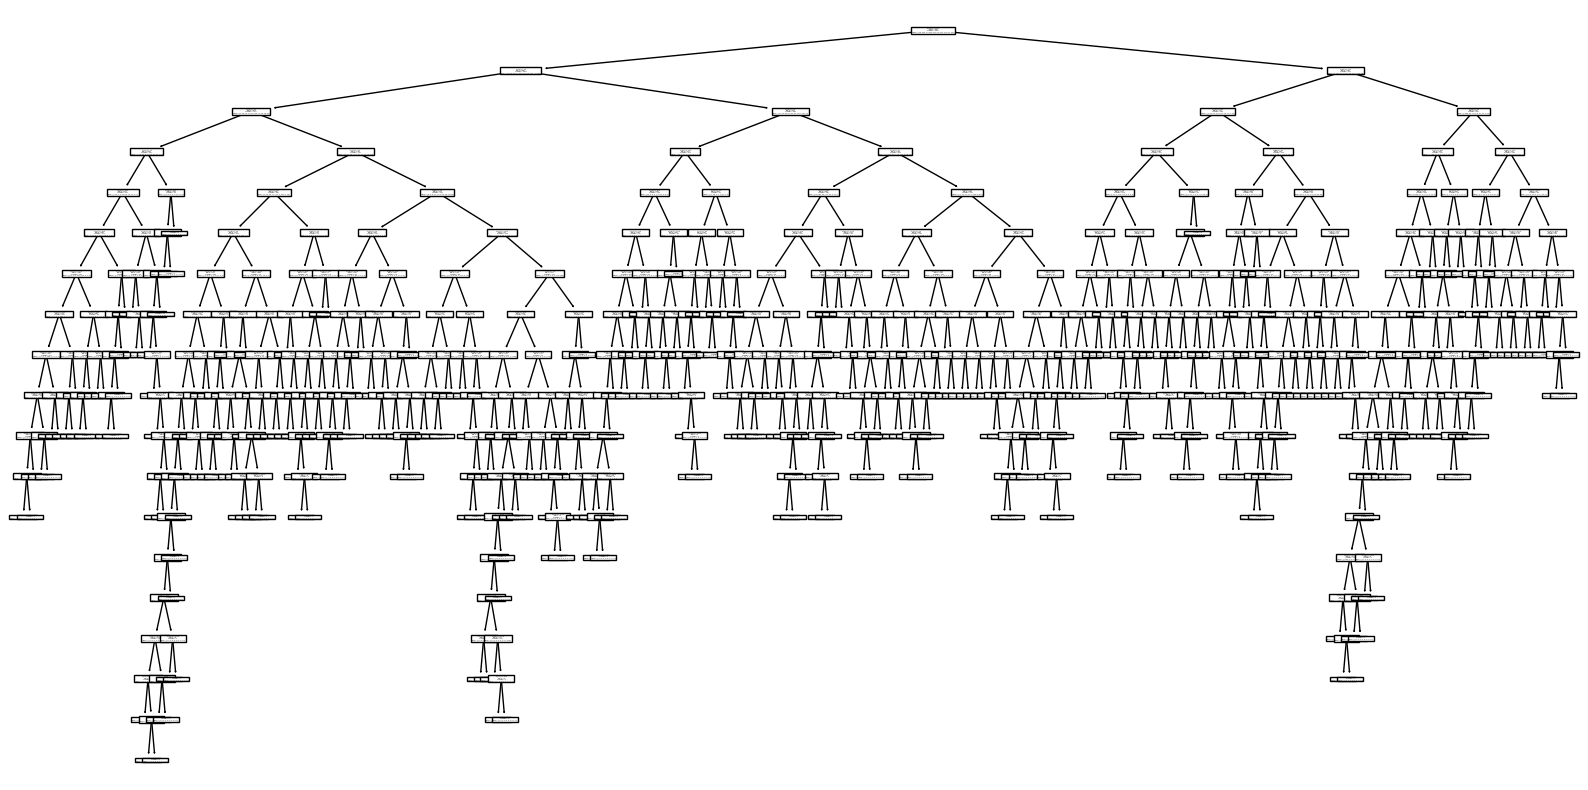

In [6]:
plt.rcParams['figure.figsize'] = [20, 10] #change inline figure size [width, higth]
tree.plot_tree(clf)
plt.show()

# 5) Naive Bayes

In [7]:
total_points_testSet = len(y_test)

## 5.1) Gaussian 


In [8]:
gnb = GaussianNB()
y_pred_gauss = gnb.fit(X_train, y_train).predict(X_test)
gauss_correct_labeled = (y_test == y_pred_gauss).sum()
print("Correct labeled(Gauss): " + str(gauss_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((gauss_correct_labeled/total_points_testSet)*100) +"%)")

Correct labeled(Gauss): 1671 from 3000 (55.7%)


## 5.2) Multinominal

In [9]:
mNB = MultinomialNB()
y_pred_multi = mNB.fit(X_train, y_train).predict(X_test)
multi_correct_labeled = (y_test == y_pred_multi).sum()
print("Correct labeled(Multinominal): " + str(multi_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((multi_correct_labeled/total_points_testSet)*100) +"%)")

Correct labeled(Multinominal): 2465 from 3000 (82.16666666666667%)


## 5.3) Complement

In [10]:
cNB = ComplementNB()
y_pred_comp = cNB.fit(X_train, y_train).predict(X_test)
comp_correct_labeled = (y_test == y_pred_comp).sum()
print("Correct labeled(Complement): " + str(comp_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((comp_correct_labeled/total_points_testSet)*100) +"%)")

Correct labeled(Complement): 2119 from 3000 (70.63333333333334%)


## 5.4) Bernoulli

In [11]:
bNB = BernoulliNB()
y_pred_ber = bNB.fit(X_train, y_train).predict(X_test)
ber_correct_labeled = (y_test == y_pred_ber).sum()
print("Correct labeled(Bernoulli): " + str(ber_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((ber_correct_labeled/total_points_testSet)*100) +"%)")

Correct labeled(Bernoulli): 2479 from 3000 (82.63333333333334%)


## 5.5) Categorical

In [12]:
catNB = CategoricalNB(min_categories=256)
y_pred_cat = catNB.fit(X_train, y_train).predict(X_test)
cat_correct_labeled = (y_test == y_pred_cat).sum()
print("Correct labeled(Categorical): " + str(cat_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((cat_correct_labeled/total_points_testSet)*100) +"%)")

Correct labeled(Categorical): 1719 from 3000 (57.3%)


## 5.6) Summary

*RNG_Seed = 0*

|test_size|Gaussian|Mutlinominal|Complement|Bernoulli|Categorical|
|---|---|---|---|---|---|
|0.1|57.33|82.83|70.17|84.17|67.17|
|0.3|56.28|82.67|70.22|83.83|62.56|
|0.5|55.7|82.17|70.63|82.63|57.3|
|0.7|56.12|82.26|70.95|81.95|48.74|
|0.9|58.94|81.7|70.48|81.0|30.48|